In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ref = 3.2e-5

In [3]:
colors = [
    '#e66101',
    '#fdb863',
    '#b2abd2',
    '#5e3c99'
]

In [5]:
os.chdir('../numerical_examples/data')

with open("bre_sus_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
bre_sus_dim_2 = pd.DataFrame(loaded_results)

with open("bre_bss_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
bre_bss_dim_2 = pd.DataFrame(loaded_results)

os.chdir('../../figures')

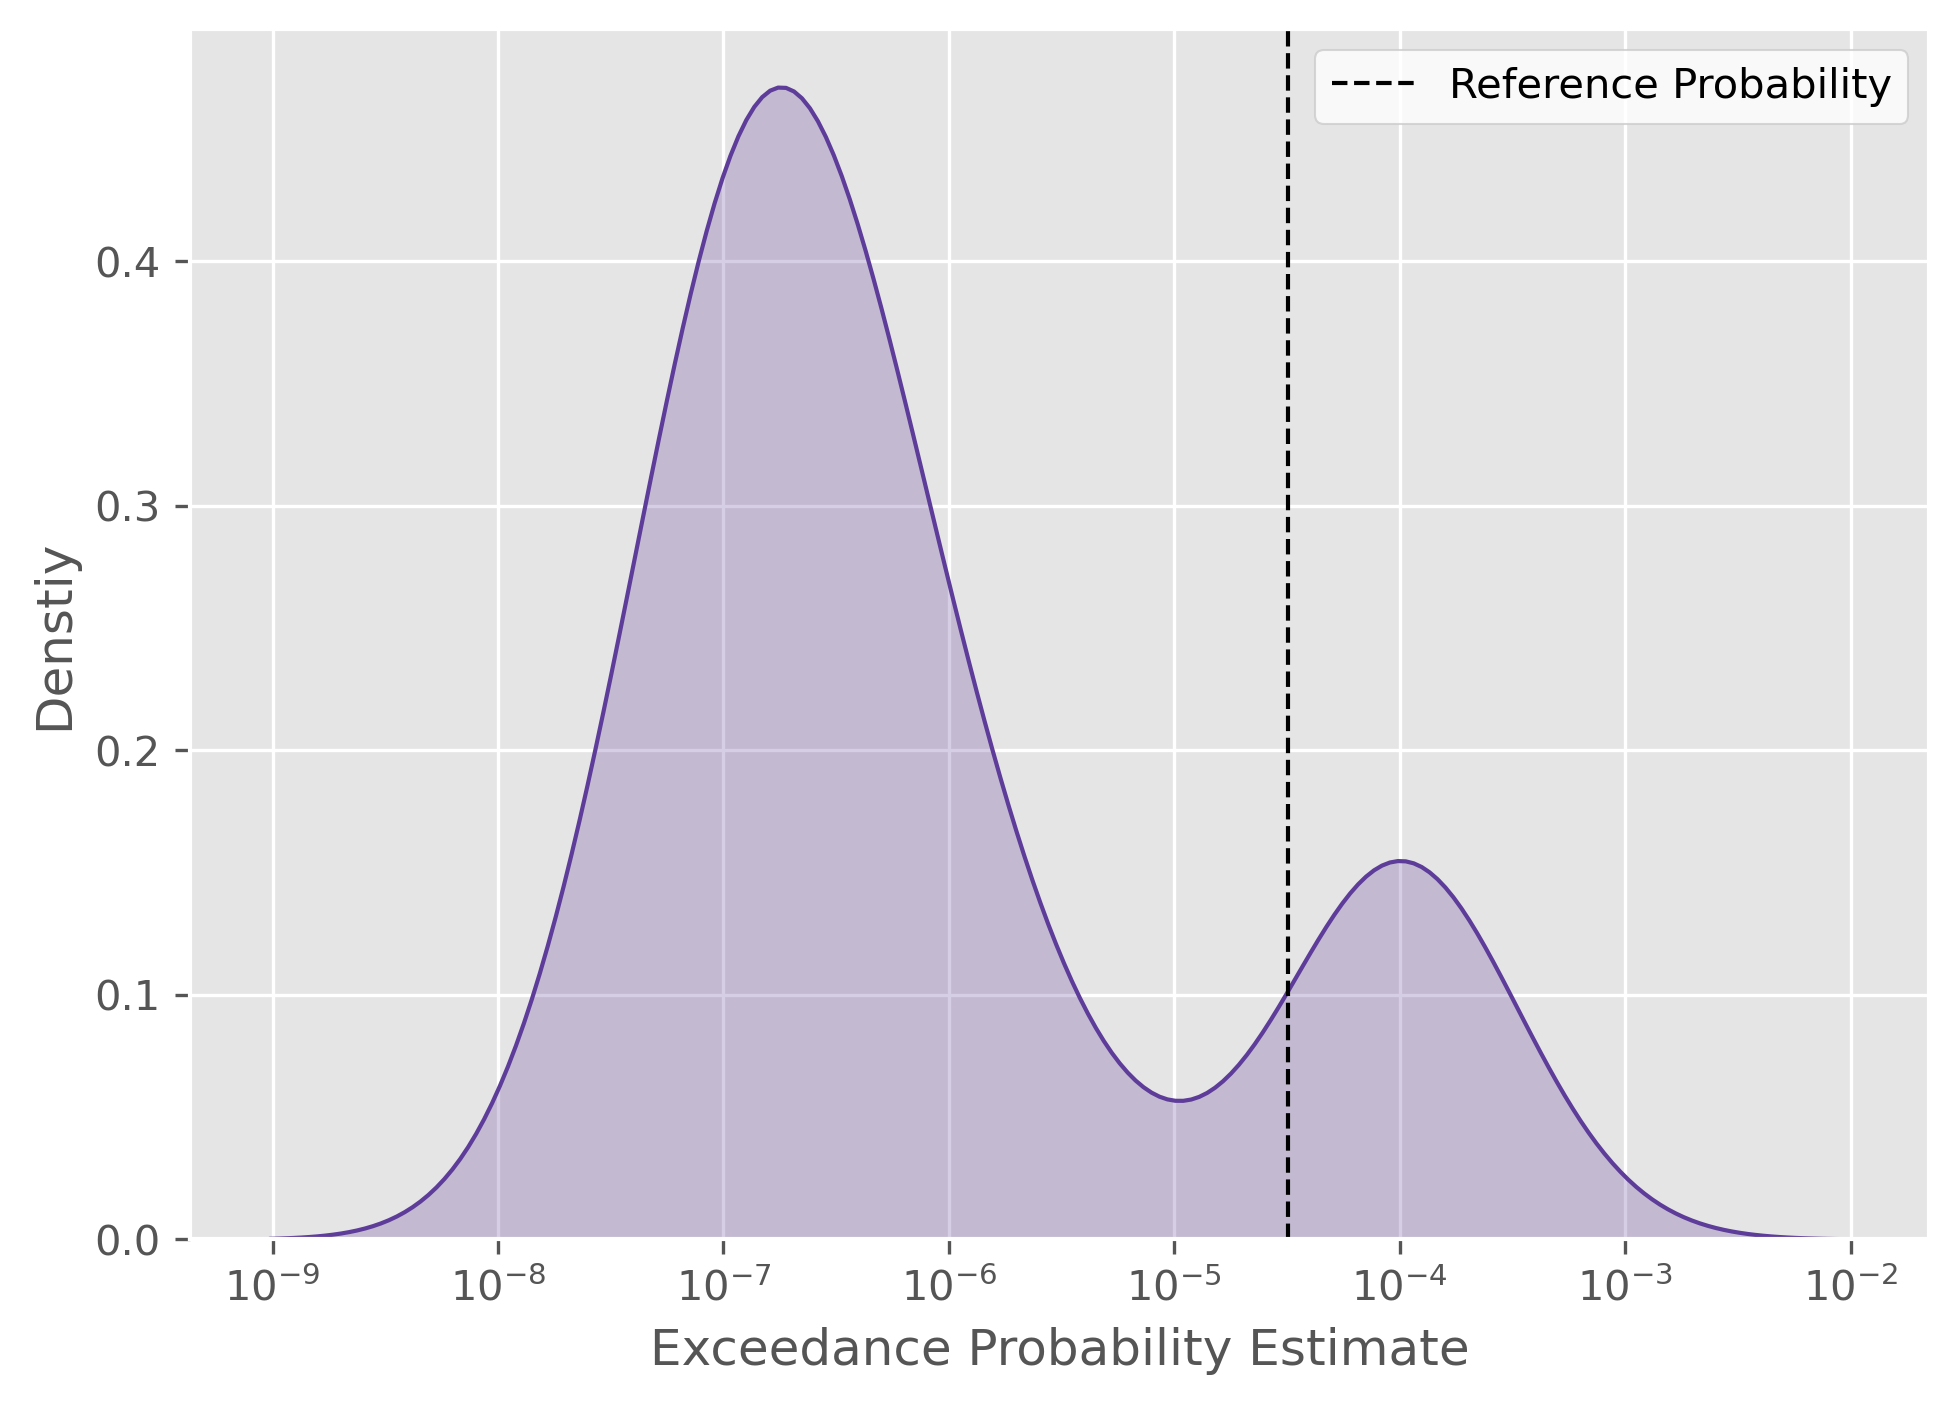

In [10]:
plt.style.use('ggplot')
cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

plt.axvline(ref,
            color='black',
            ymax=1,
            alpha=1,
            linestyle='dashed',
            linewidth=1,
            label='Reference Probability')


sns.kdeplot(data=np.array(bre_sus_dim_2[bre_sus_dim_2['size']==500]['exceedance_estimate']),
            log_scale=True,
            fill=True,
            linewidth=1,
            color=colors[3],
            )



plt.xlabel('Exceedance Probability Estimate')
plt.ylabel('Denstiy')
plt.minorticks_off()

plt.legend(fontsize=10,frameon=True,facecolor='white',loc='upper right')

plt.savefig('linear_sus_kde.pdf',bbox_inches='tight')

plt.show()

In [12]:
bre_sus_dim_2[bre_sus_dim_2['size']==500]['region_indicator'].sum()

23

In [13]:
bre_sus_dim_2[bre_sus_dim_2['size']==500]['exceedance_estimate'].mean()

2.4490532664950326e-05

C:\Users\hkinn\AppData\Local\Temp\ipykernel_18040\2722168182.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=np.array(bre_bss_dim_2[bre_bss_dim_2['size']==500]


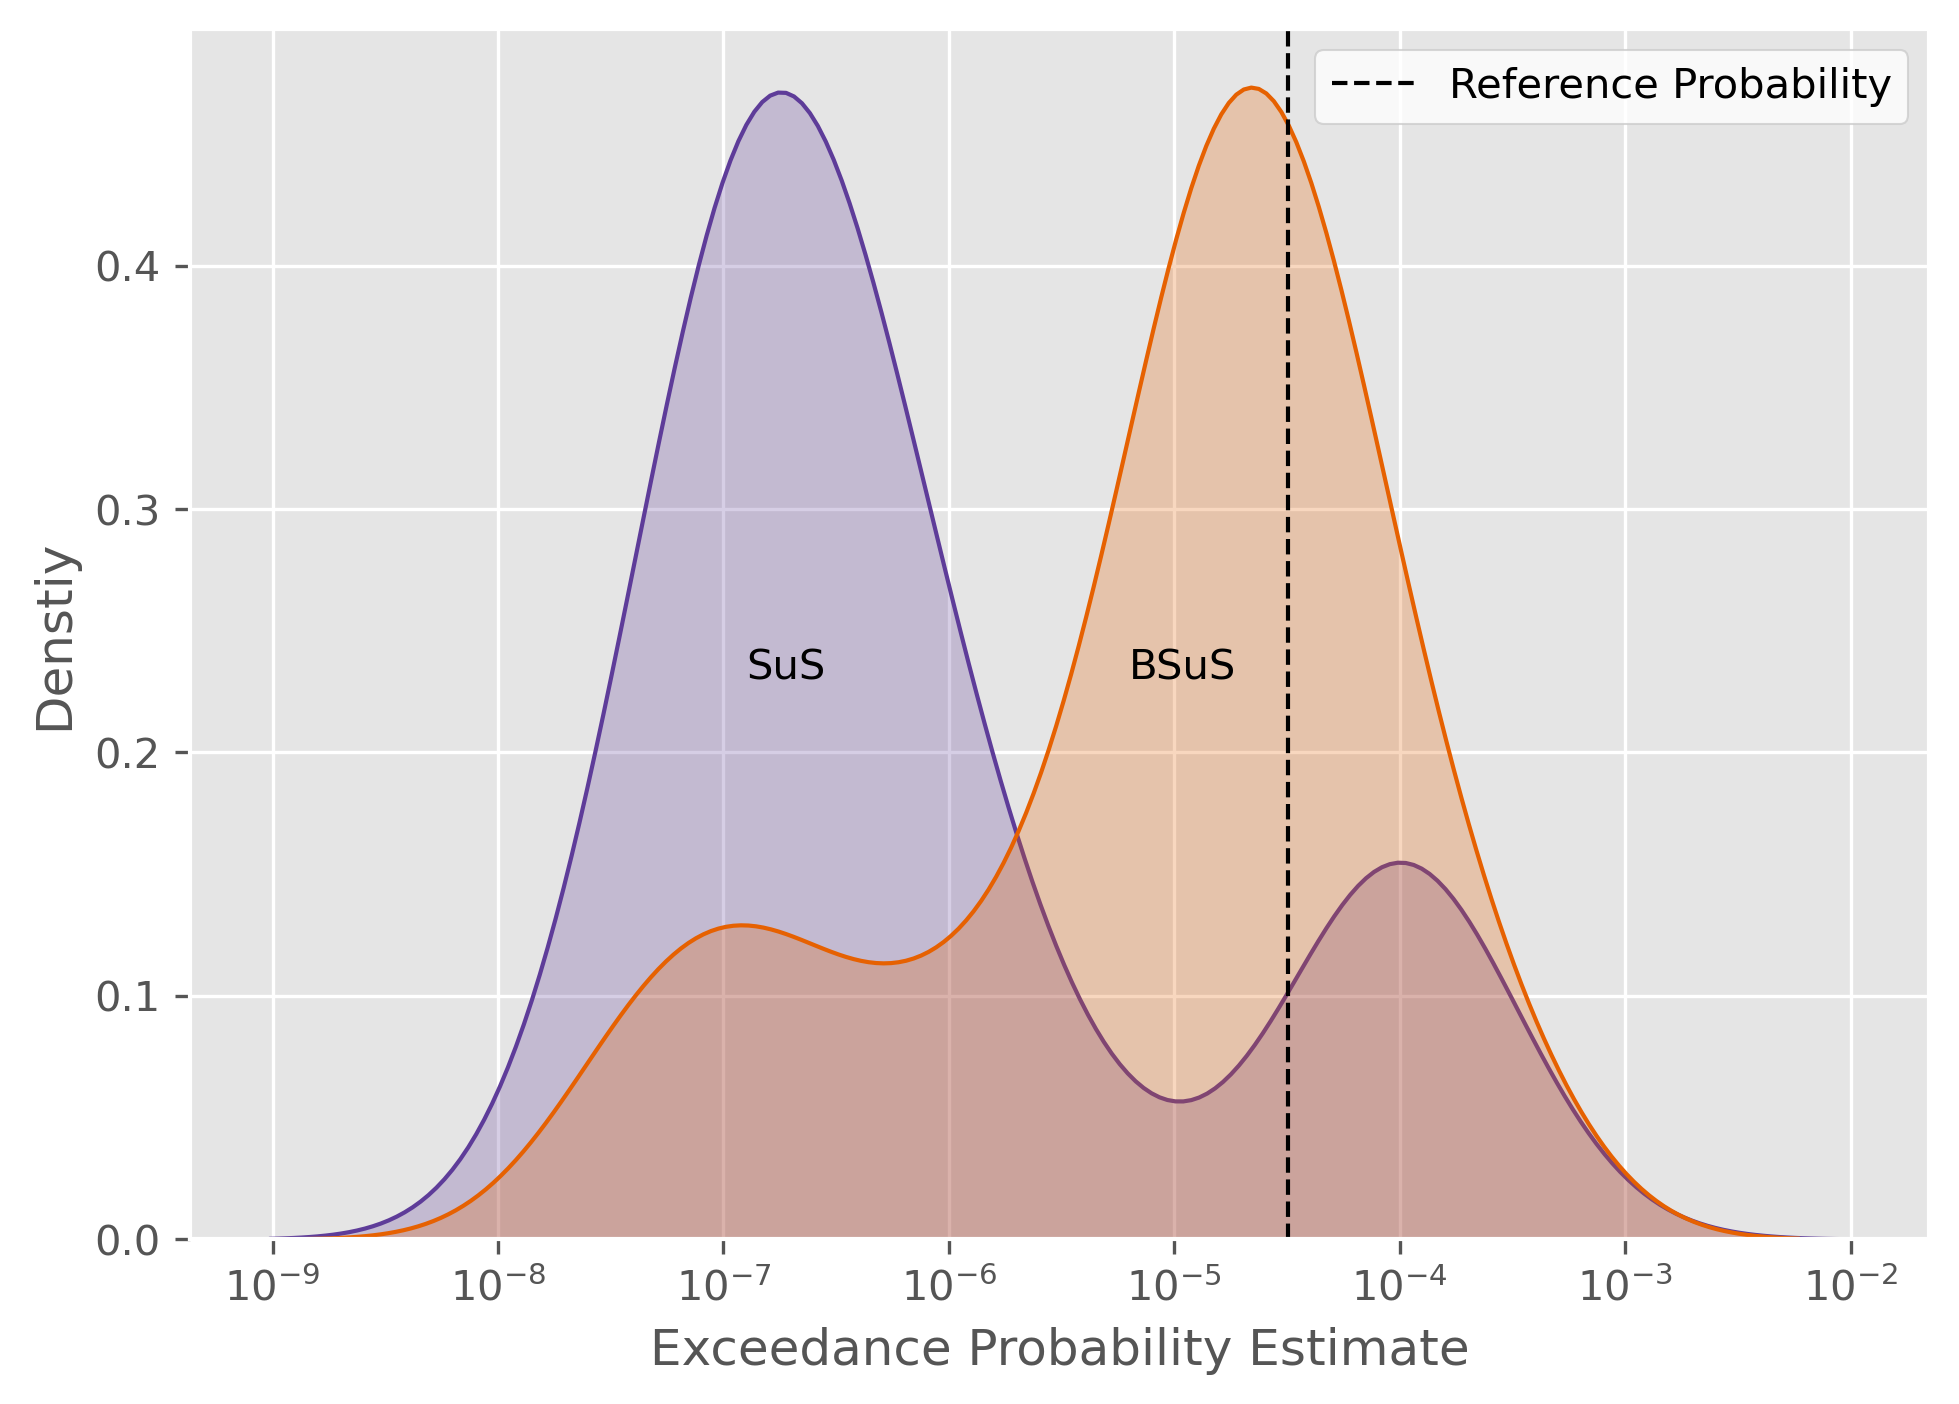

In [17]:
plt.style.use('ggplot')
cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)



plt.axvline(ref,
            color='black',
            alpha=1,
            linestyle='dashed',
            linewidth=1,
            label='Reference Probability')


sns.kdeplot(data=np.array(bre_sus_dim_2[bre_sus_dim_2['size']==500]['exceedance_estimate']),
            log_scale=True,
            fill=True,
            linewidth=1,
            color=colors[3],
            )

sns.kdeplot(data=np.array(bre_bss_dim_2[bre_bss_dim_2['size']==500]
                          [ bre_bss_dim_2['graph_budget'] ==100]
                          ['exceedance_estimate']),
            log_scale=True,
            fill=True,
            linewidth=1,
            color=colors[0],
            )

plt.xlabel('Exceedance Probability Estimate')
plt.ylabel('Denstiy')
plt.minorticks_off()

plt.legend(fontsize=10,frameon=True,facecolor='white',loc='upper right')

# plt.text(3.2*10**-(5.15),0.87,'RP')
plt.text(10**-(5.2),0.23,'BSuS')
plt.text(10**-(6.9),0.23,'SuS')

plt.savefig('linear_bss_kde.pdf',bbox_inches='tight')

plt.show()